importing dependecies


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot


data collection and processing 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the csv data to a pandas dataframe
df=pd.read_csv('/content/combined1_int_mean_imputed1.csv')

In [ ]:
df.columns

Index(['Gender', 'Dependent_count', 'Marital_Status', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Attrition_Flag'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13392 entries, 0 to 13391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    13392 non-null  int64
 1   Dependent_count           13392 non-null  int64
 2   Marital_Status            13392 non-null  int64
 3   Card_Category             13392 non-null  int64
 4   Total_Relationship_Count  13392 non-null  int64
 5   Months_Inactive_12_mon    13392 non-null  int64
 6   Contacts_Count_12_mon     13392 non-null  int64
 7   Total_Amt_Chng_Q4_Q1      13392 non-null  int64
 8   Total_Trans_Ct            13392 non-null  int64
 9   Total_Ct_Chng_Q4_Q1       13392 non-null  int64
 10  Attrition_Flag            13392 non-null  int64
dtypes: int64(11)
memory usage: 1.1 MB


In [ ]:
#printing the 10 five rows of a data frame
df.head(10)

,Gender,Dependent_count,Marital_Status,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
0,0,2,2,0,3,1,1,0,42,0,1
1,0,3,2,0,0,3,1,0,40,0,1
2,1,2,2,0,4,2,5,0,63,0,1
3,0,3,1,0,3,1,2,0,32,0,1
4,1,3,1,0,1,2,5,0,29,0,1
5,1,2,2,0,4,3,2,0,22,0,1
6,0,2,0,0,3,3,2,1,70,0,2
7,0,4,1,0,2,3,3,1,48,0,1
8,0,3,3,0,1,2,1,0,79,0,2
9,1,3,2,0,0,3,3,0,73,0,2


In [ ]:
#printing the last 10 rows of a dataset
df.tail(10)


,Gender,Dependent_count,Marital_Status,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
13382,0,2,1,0,2,2,2,0,54,0,1
13383,0,2,1,0,2,2,2,0,54,0,1
13384,0,2,1,0,2,2,2,0,54,0,1
13385,0,2,1,0,2,2,2,0,54,0,1
13386,0,2,1,0,2,2,2,0,54,0,0
13387,0,2,1,0,2,2,2,0,54,0,0
13388,0,2,1,0,2,2,2,0,54,0,1
13389,0,2,1,0,2,2,2,0,54,0,0
13390,0,2,1,0,2,2,2,0,54,0,1
13391,0,2,1,0,2,2,2,0,54,0,1


In [ ]:
#number of rows and cols in a dataset 
df.shape

(13392, 11)

In [ ]:
#getting some info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13392 entries, 0 to 13391
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    13392 non-null  int64
 1   Dependent_count           13392 non-null  int64
 2   Marital_Status            13392 non-null  int64
 3   Card_Category             13392 non-null  int64
 4   Total_Relationship_Count  13392 non-null  int64
 5   Months_Inactive_12_mon    13392 non-null  int64
 6   Contacts_Count_12_mon     13392 non-null  int64
 7   Total_Amt_Chng_Q4_Q1      13392 non-null  int64
 8   Total_Trans_Ct            13392 non-null  int64
 9   Total_Ct_Chng_Q4_Q1       13392 non-null  int64
 10  Attrition_Flag            13392 non-null  int64
dtypes: int64(11)
memory usage: 1.1 MB


In [ ]:
#checking for missing values
df.isnull()

,Gender,Dependent_count,Marital_Status,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
13387,False,False,False,False,False,False,False,False,False,False,False
13388,False,False,False,False,False,False,False,False,False,False,False
13389,False,False,False,False,False,False,False,False,False,False,False
13390,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Gender                      0
Dependent_count             0
Marital_Status              0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Attrition_Flag              0
dtype: int64

In [ ]:
#checking the distribution of Target variable
df['Attrition_Flag'].value_counts()

1    8500
2    3265
0    1627
Name: Attrition_Flag, dtype: int64

0 -> no heart disease 
1-->chance of  heart disease 

In [ ]:
#tranforming categorical data to numerical
#from sklearn.preprocessing import LabelEncoder 
#labelencoder= LabelEncoder() 
#for column in df:
 #   df[column] = labelencoder.fit_transform(df[column]) 
#df.head(50)

In [ ]:
df.tail()

,Gender,Dependent_count,Marital_Status,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Attrition_Flag
13387,0,2,1,0,2,2,2,0,54,0,0
13388,0,2,1,0,2,2,2,0,54,0,1
13389,0,2,1,0,2,2,2,0,54,0,0
13390,0,2,1,0,2,2,2,0,54,0,1
13391,0,2,1,0,2,2,2,0,54,0,1


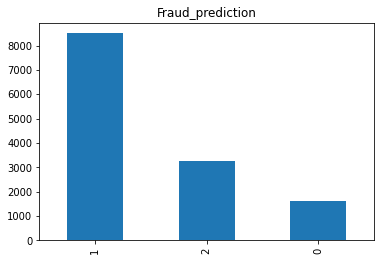

In [ ]:
df["Attrition_Flag"].value_counts().plot(kind='bar',
                                   title='Fraud_prediction')
plt.show()

In [ ]:
#splitting the features and target 
#as we are dropping the colums so 1 if row 0
X=df.drop(columns='Attrition_Flag',axis=1)
y=df['Attrition_Flag']

In [ ]:
#splitting the data into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X , y, test_size=0.20, stratify=y,  random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(13392, 10) (10713, 10) (2679, 10)


MODEL TRAINING

logic regression 

In [ ]:
lr = LogisticRegression()
etc = ExtraTreesClassifier()

In [ ]:
combined_model = [('lr', lr), ('etc', etc)]

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(combined_model, voting='soft', weights=[0.6, 0.4])
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('etc', ExtraTreesClassifier())],
                 voting='soft', weights=[0.6, 0.4])

In [ ]:
# Get predicted probabilities from combined model
combined_probs = voting_clf.predict_proba(X_test)

In [ ]:
# Get predicted labels by choosing the class with the highest probability
pred_labels = np.argmax(combined_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_labels)
print('Accuracy:', accuracy)

Accuracy: 0.6173945502053005


In [ ]:
import pickle
# Save the model as a pickle file
with open('credit_1.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

In [ ]:
model=LogisticRegression()

In [ ]:
#training the logistic regression 
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
clf = svm.SVC(kernel='linear')


In [ ]:
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.6345651362448674


MODEL EVALUATION 

In [ ]:
#accuracy score
X_Train_predection=model.predict(X_train)
training_accuracy=accuracy_score(X_Train_predection,y_train)

In [ ]:
print("accuracy on Training data :",training_accuracy)

accuracy on Training data : 0.6336227013908335


In [ ]:
#accuracy on test data
X_Test_predection=model.predict(X_test)
testing_accuracy=accuracy_score(X_Test_predection,y_test)

In [ ]:
print("accuracy on testing data : ",testing_accuracy)

accuracy on testing data :  0.6349384098544233


In [ ]:
import pickle
# Save the model as a pickle file
with open('credit_2.pkl', 'wb') as f:
    pickle.dump(model, f)

BUILDING A PREDECTIVE MODEL 

In [ ]:
input_data=(768805383,45,M,3,High_School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061)

SyntaxError: ignored

In [ ]:
df = pd.DataFrame(input_data, index=[0])

NameError: ignored

In [ ]:
input_data=(768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691,777,11914,1.335,1144,42,1.625,0.061)


#converting  the input data into numpy array 
input_data_numpyarray=np.asarray(input_data)

#reshape the numpy array as we are predecting only for one instance
input_data_reshape=input_data_numpyarray.reshape(1,-1)

#predection
predection= model.predict(input_data_reshape)
# print(predection)

if (predection[0]==0):
  print("the pesron doesnot have heart disease")

else:
  print("the person has heart disease ")
       







the pesron doesnot have heart disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'cc_attrition.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('cc_attrition.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

CLIENTNUM
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
